In [233]:
import sys

# Move to scripts directory
sys.path.append('../scripts')

from create_cross_sec import create_cross_sec

In [256]:
import numpy as np
import pickle


f = open(f"/Users/akotamraju/Documents/dev/URAP/main-responseapprox/data/cross-sec-data/FlatContinuumIsotropic.inc527.id1.tra.gz.pkl", "rb");
    
vals = pickle.load(f)

y_arr = np.array(vals['y'])
print(y_arr.shape)

f.close()

(36, 196608)


In [257]:
print(y_arr)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [258]:
NSIDE = 16
NUMPIX = 12 * NSIDE ** 2
COMPTON_RESOLUTION_DEG = 5

# split_data = create_cross_sec(arr, NSIDE, NUMPIX, COMPTON_RESOLUTION_DEG)

/Users/akotamraju/opt/anaconda3/envs/nn_response/lib/python3.7/site-packages/healpy/visufunc.py:200: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  f = pylab.figure(fig, figsize=(8.5, 5.4))


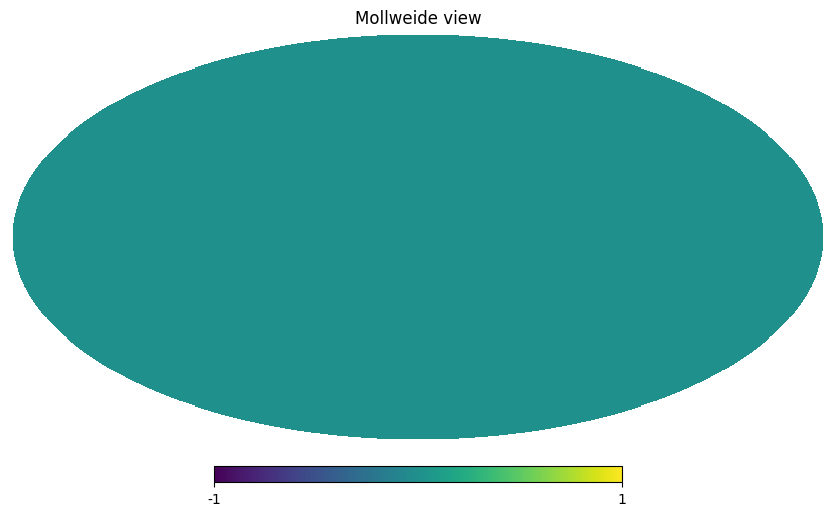

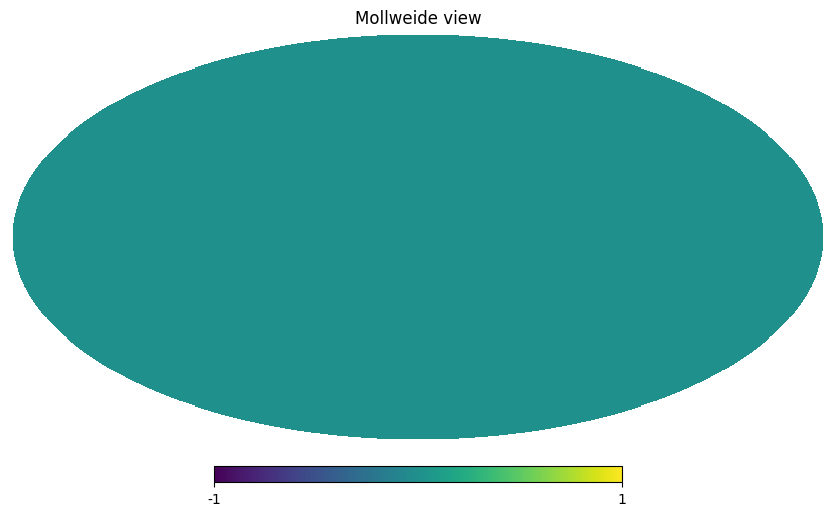

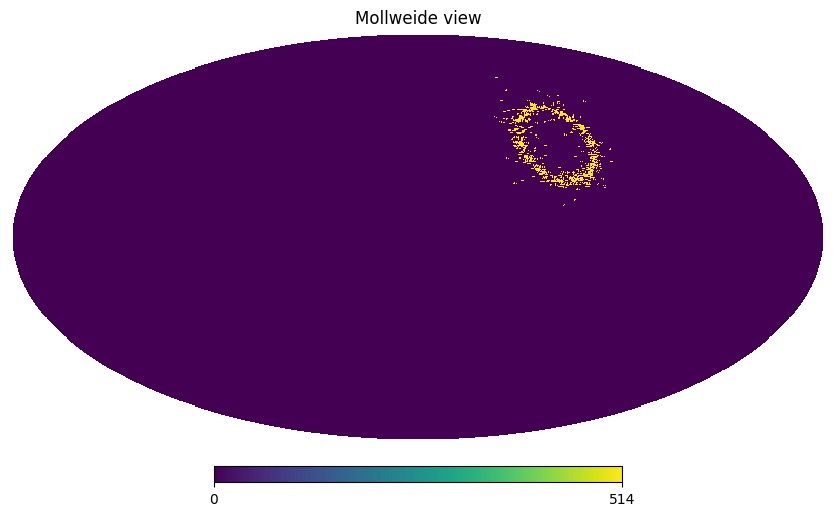

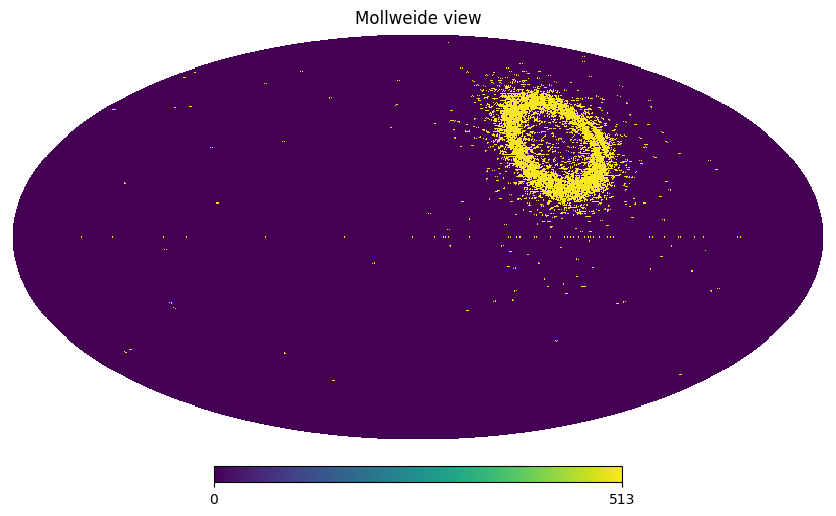

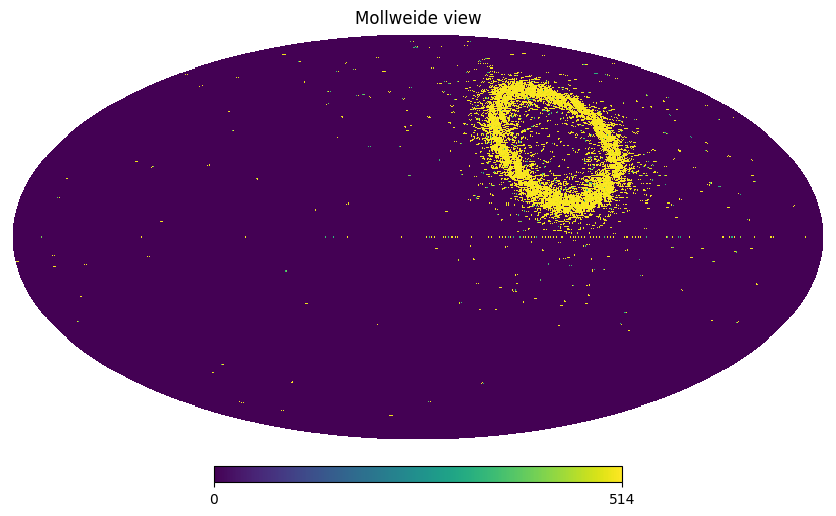

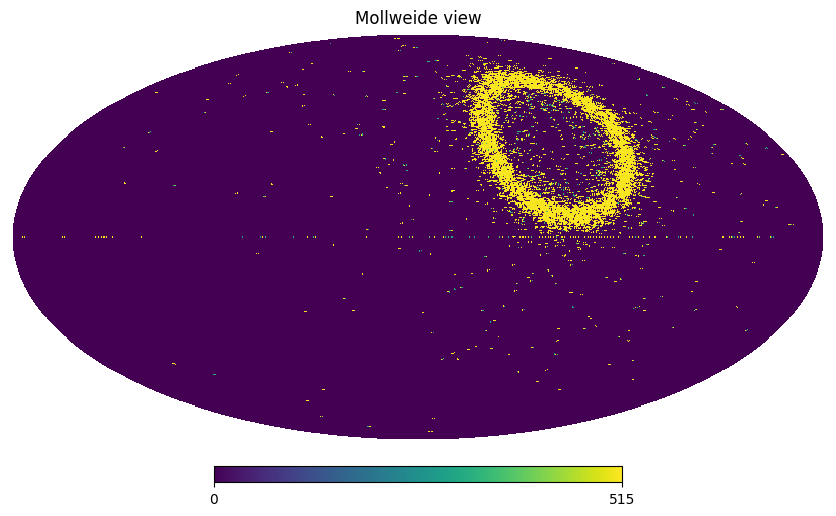

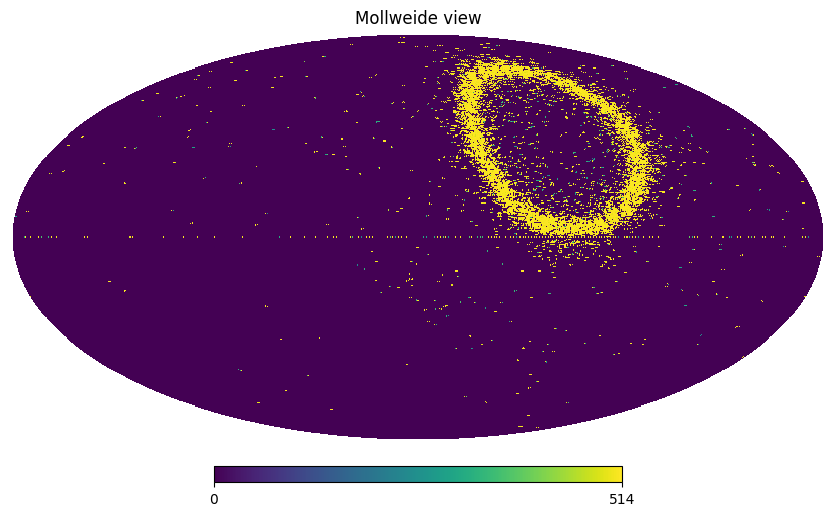

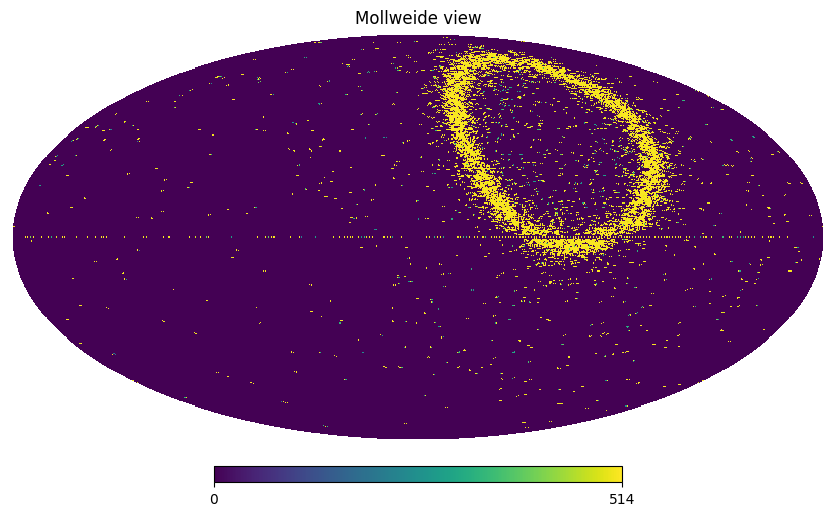

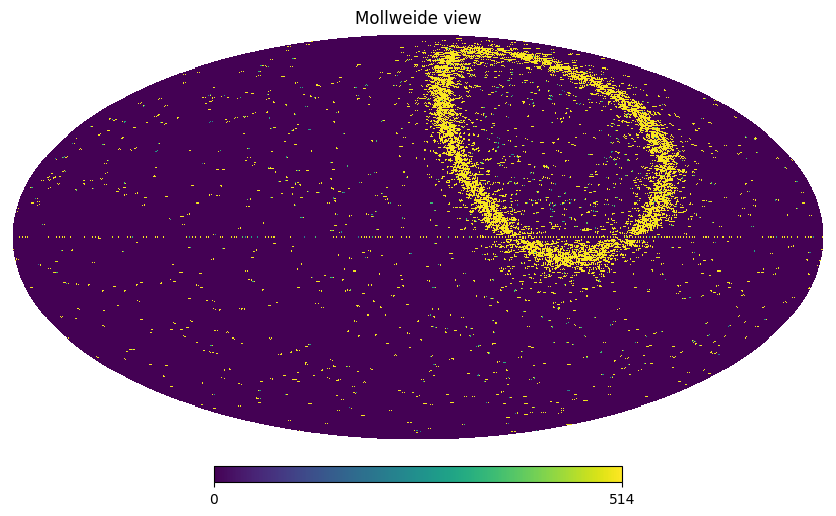

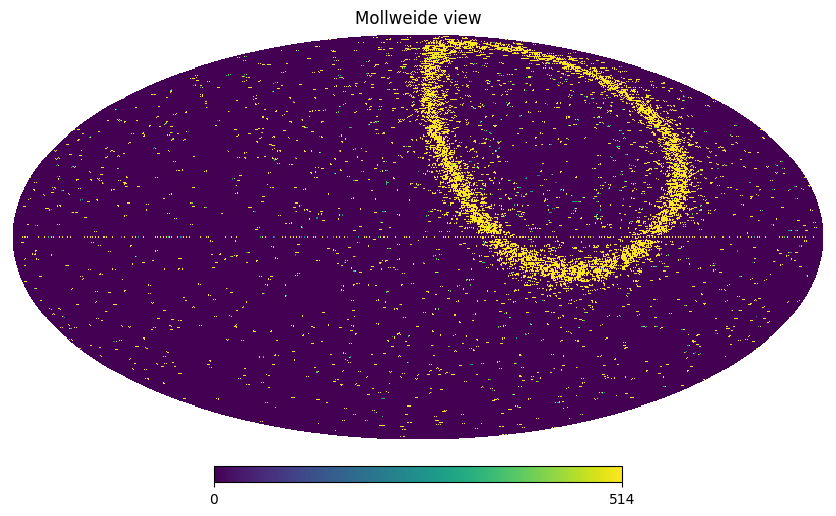

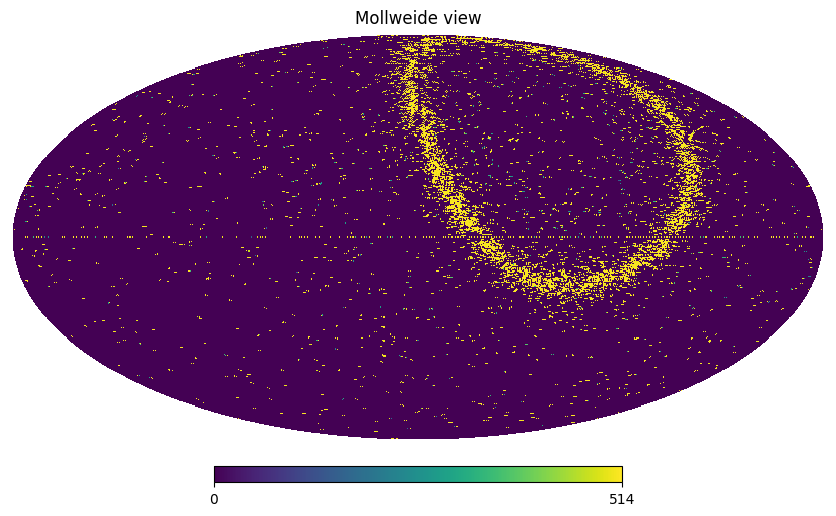

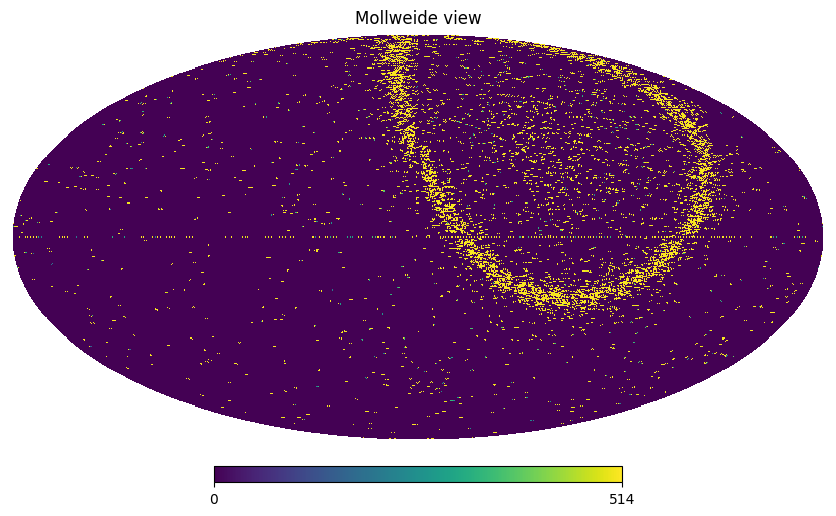

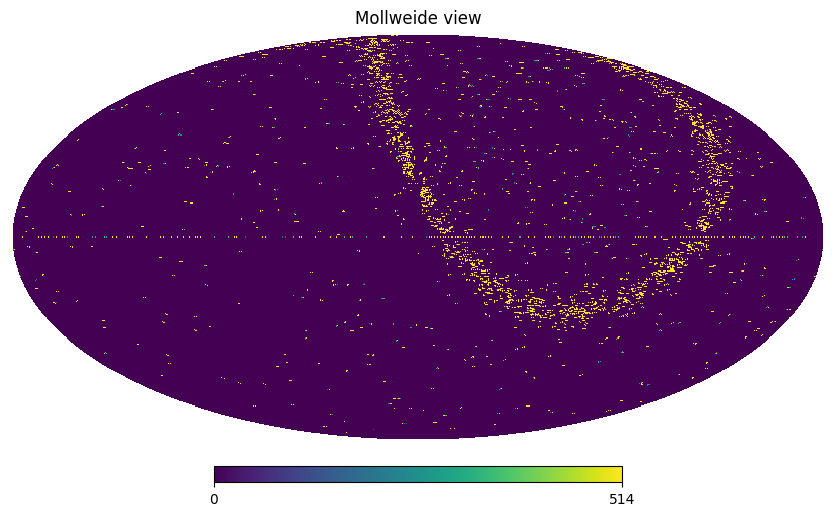

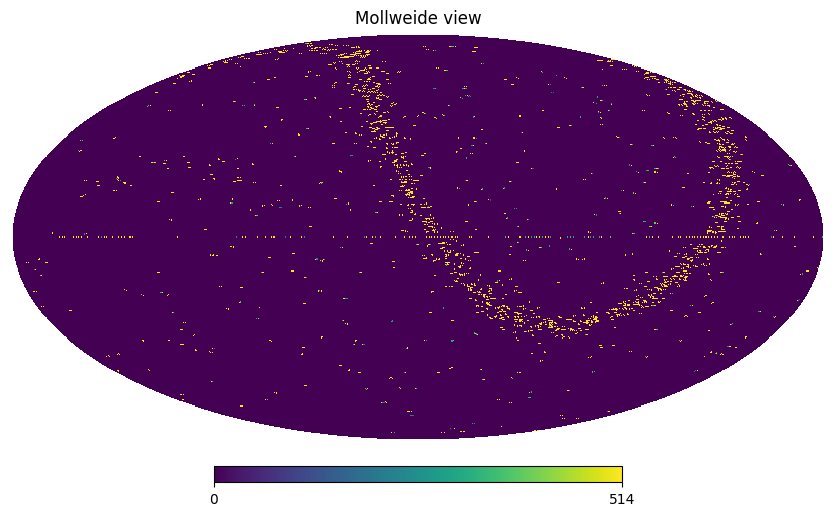

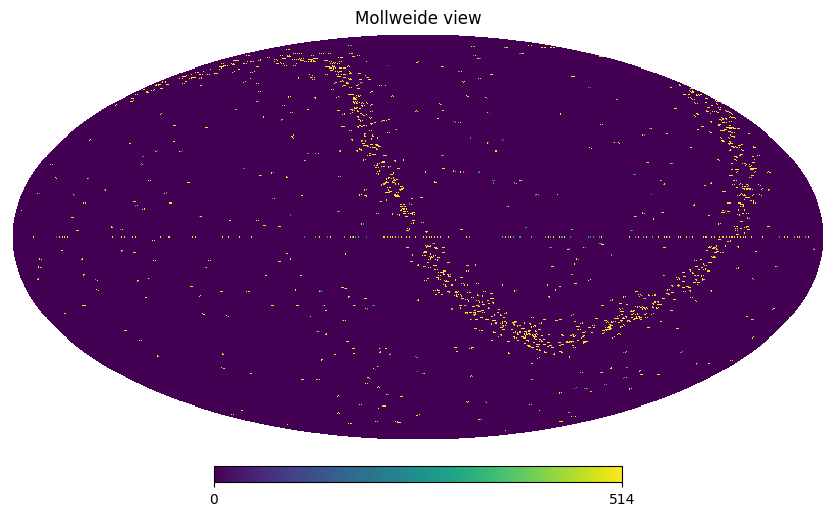

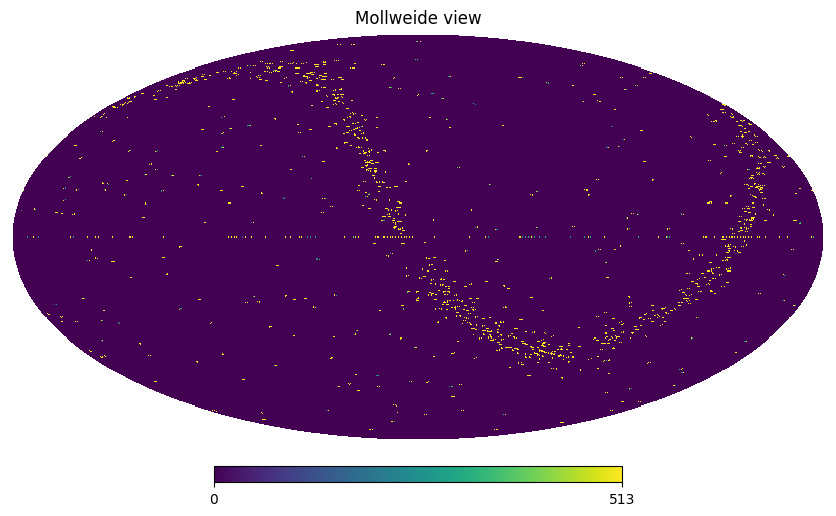

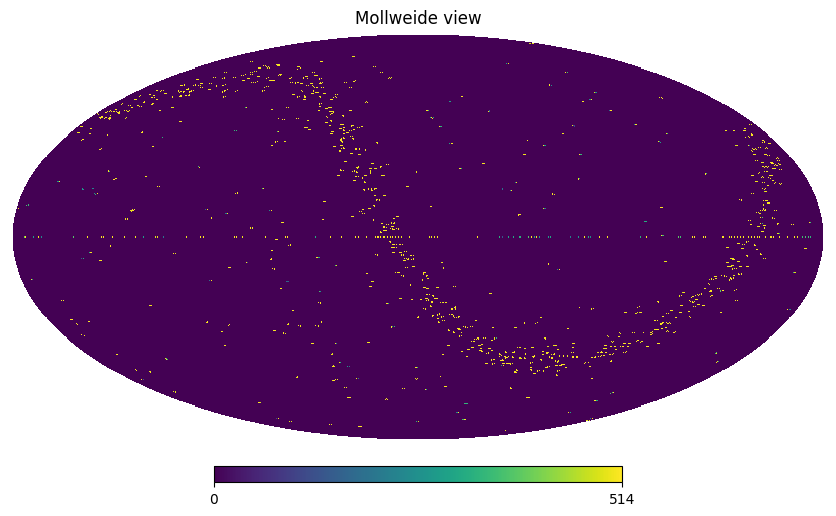

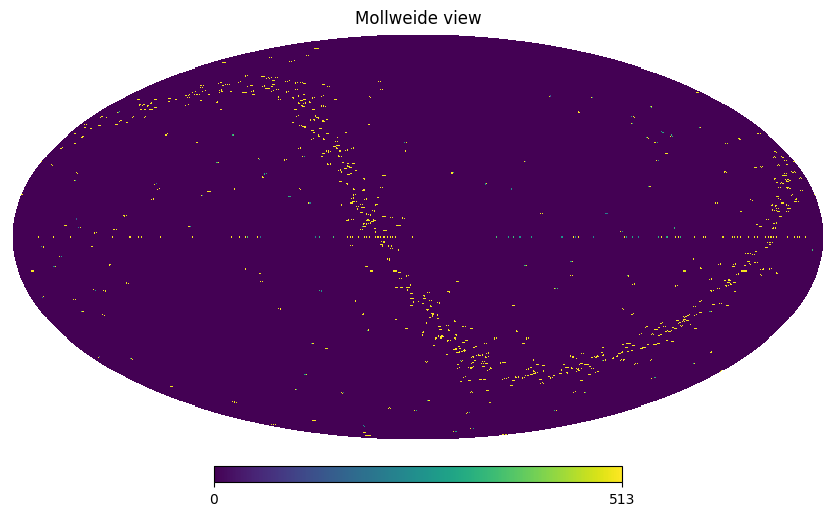

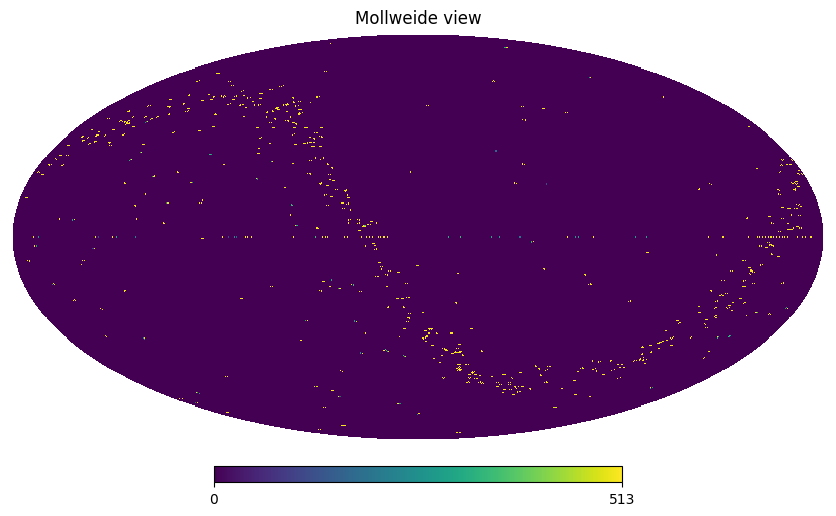

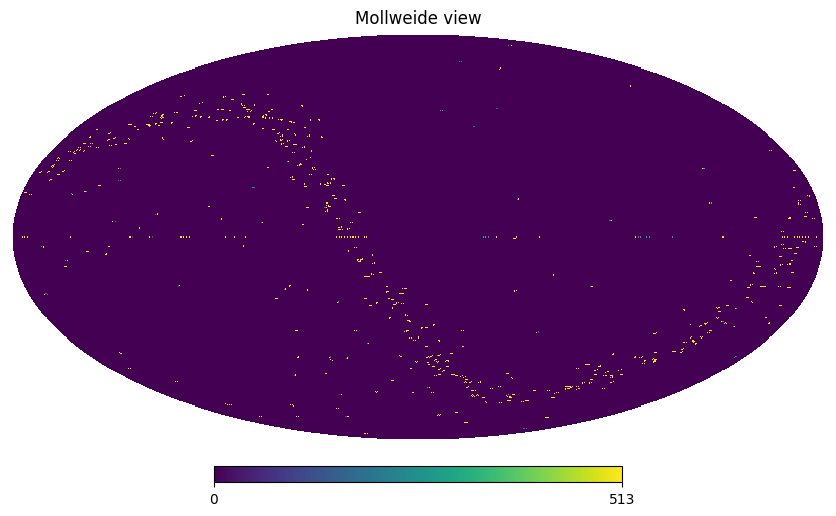

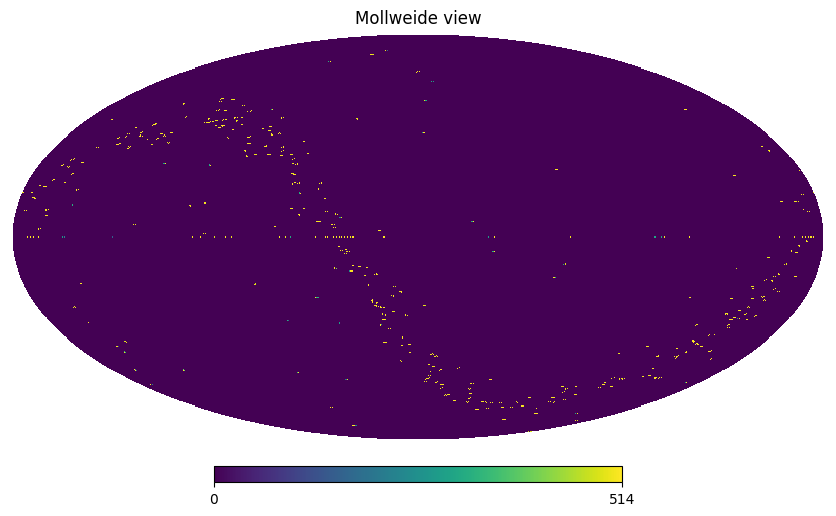

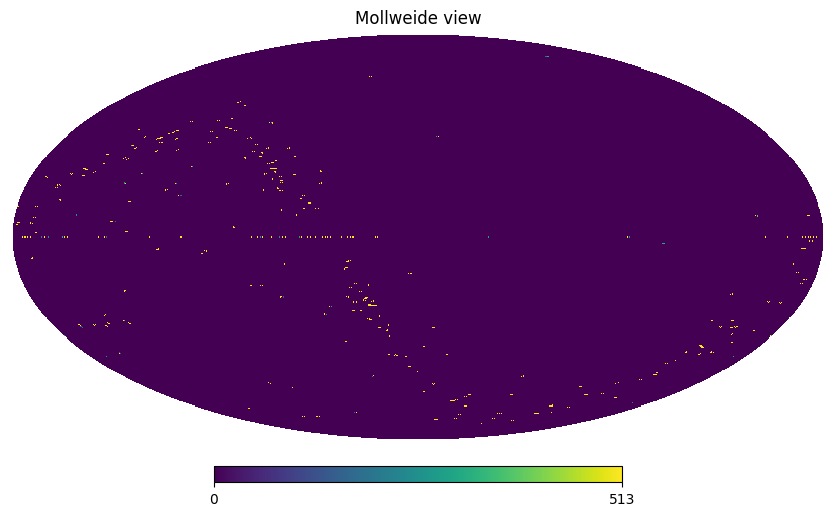

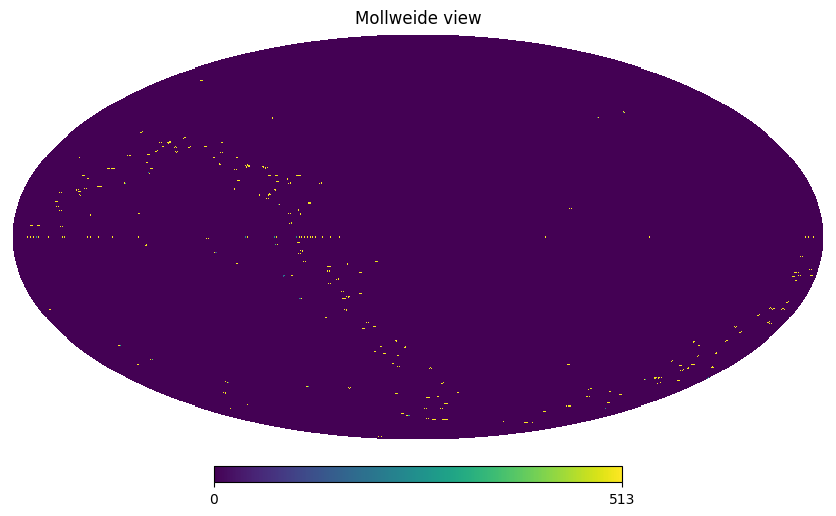

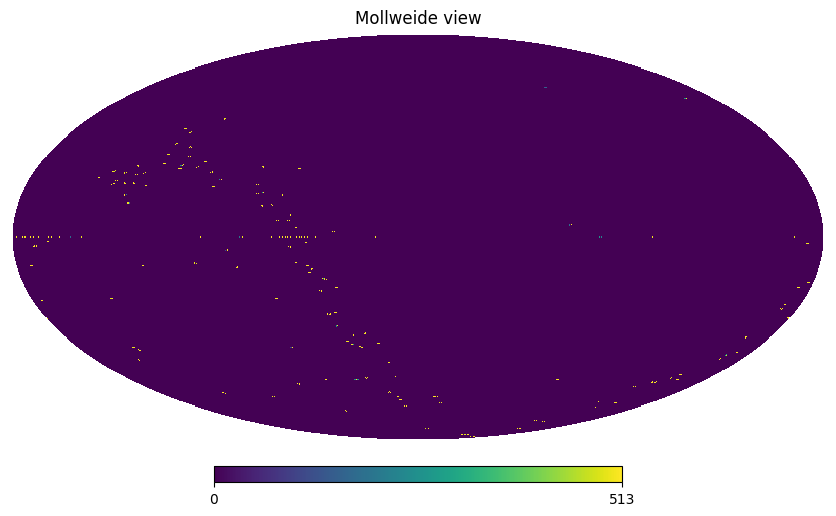

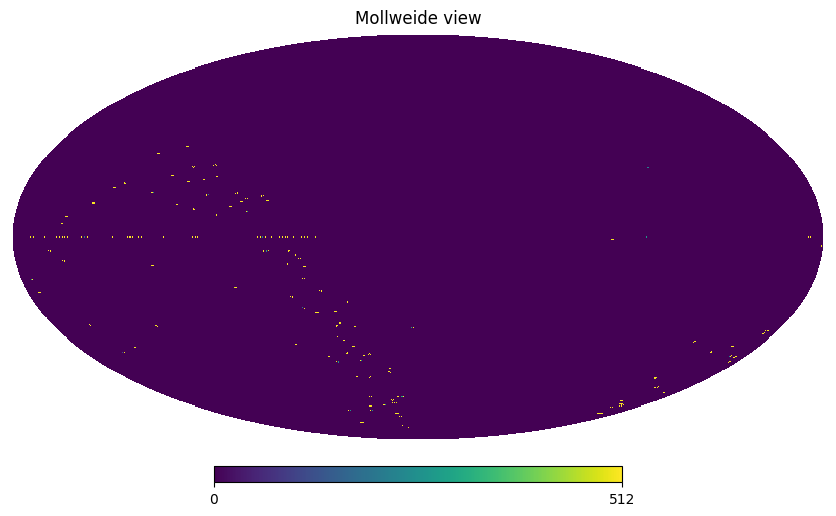

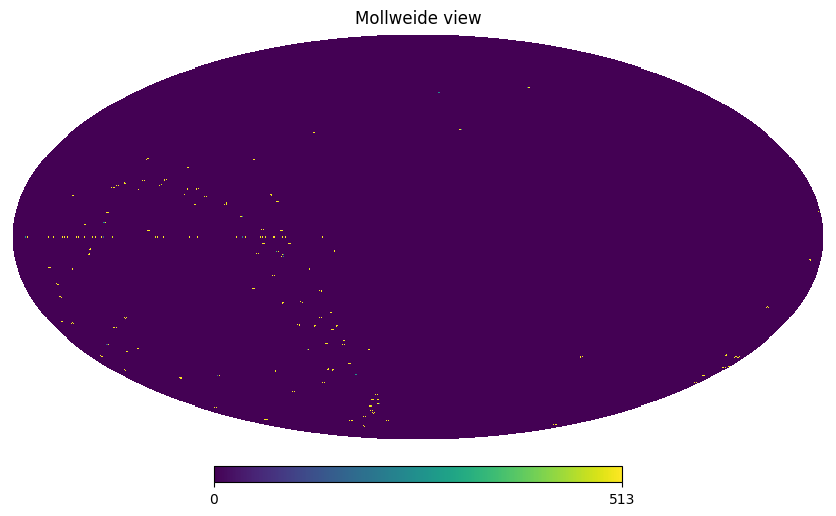

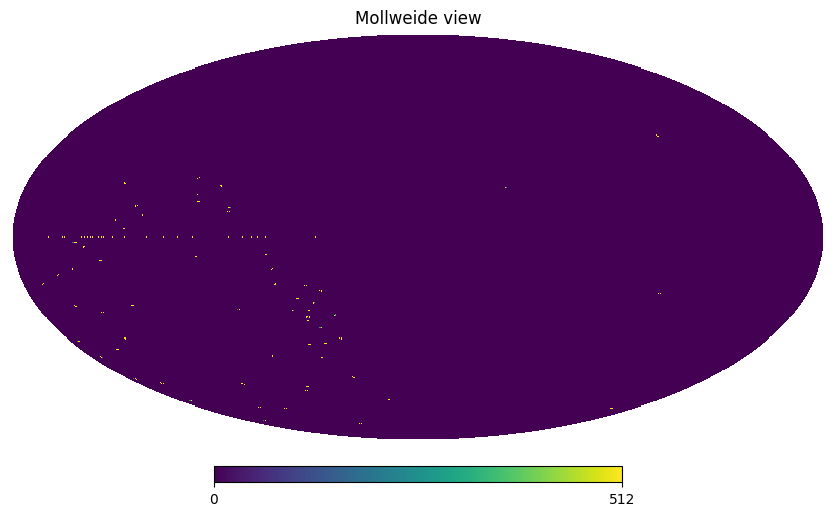

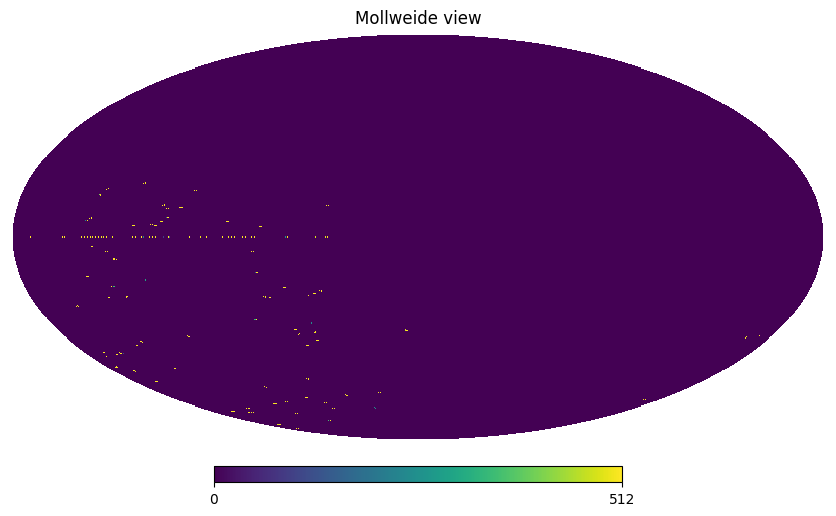

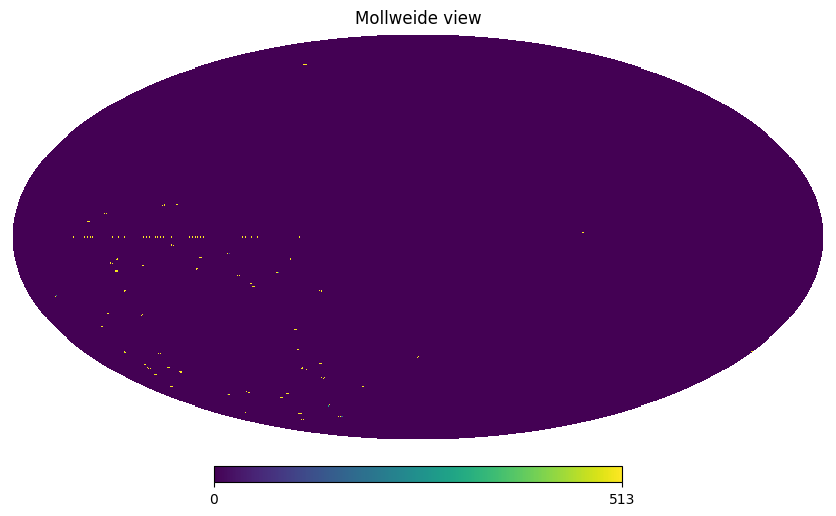

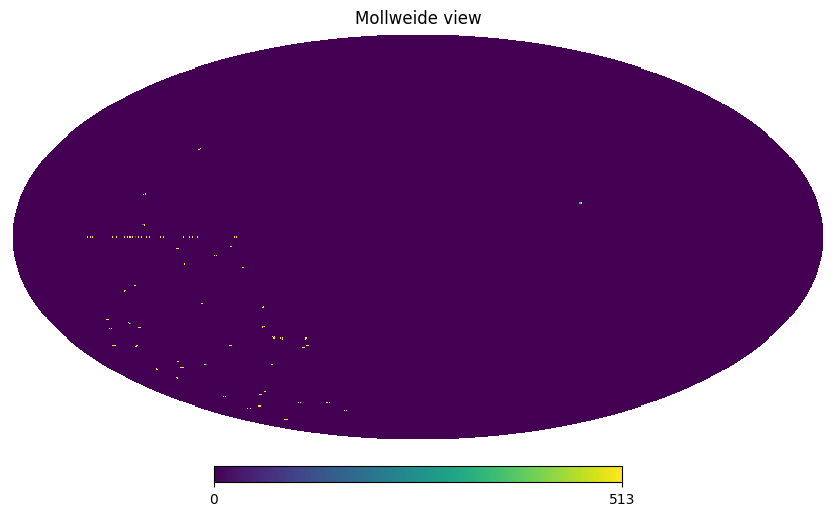

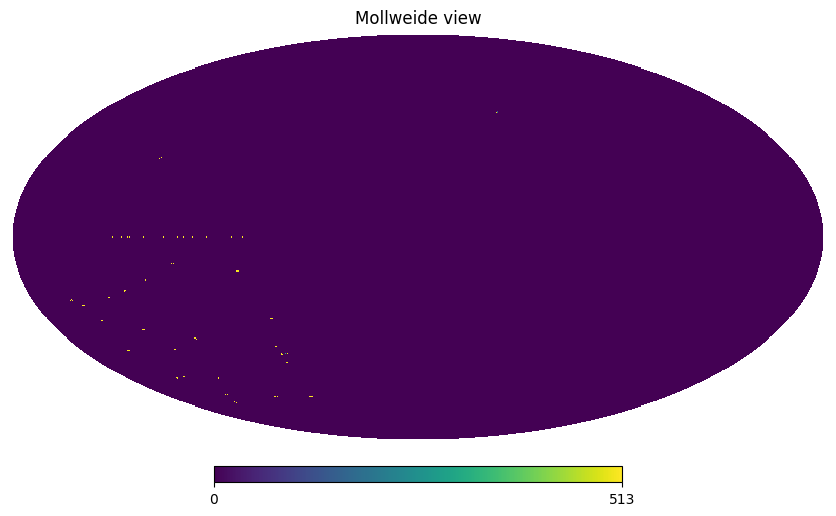

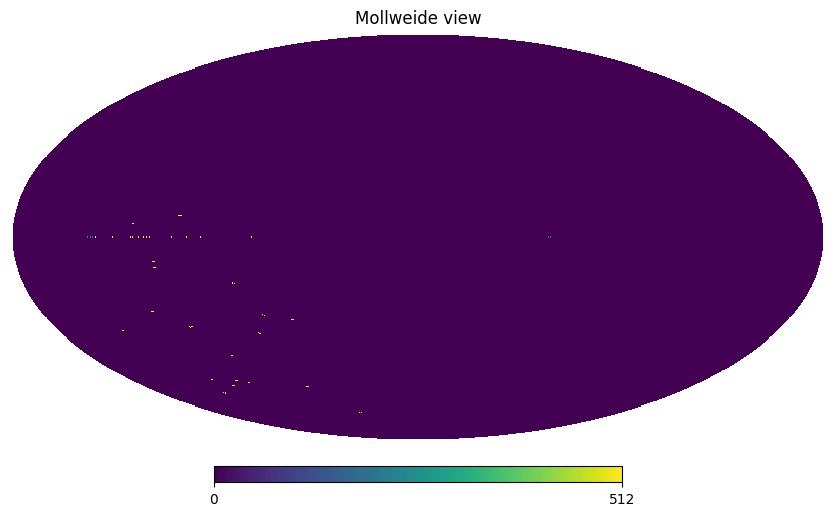

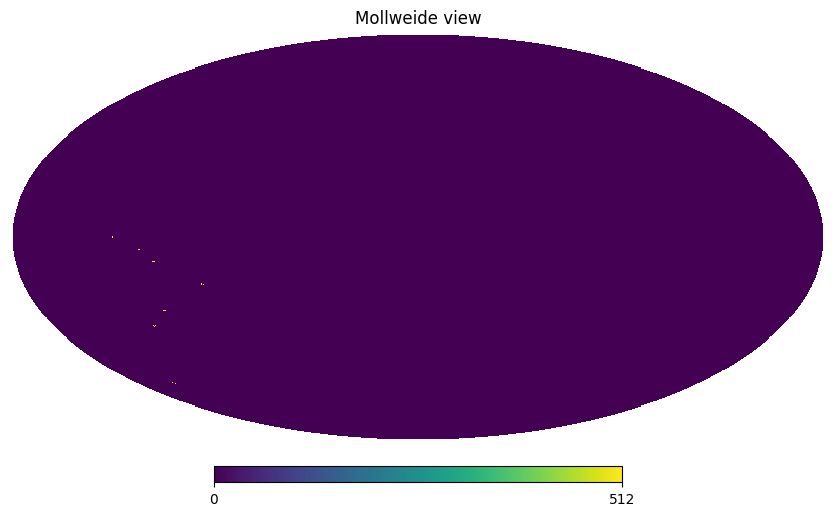

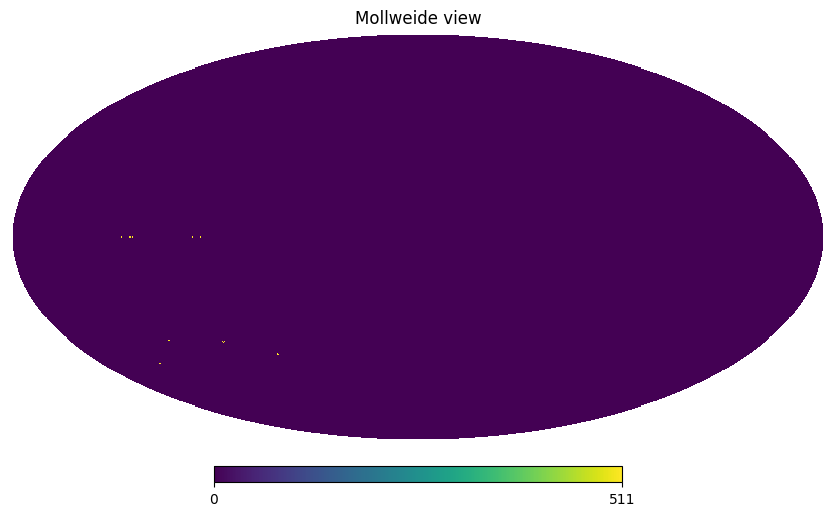

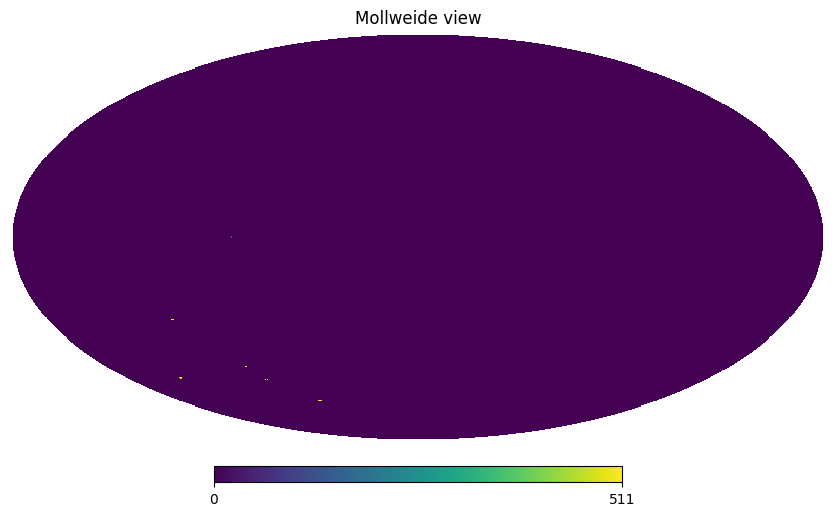

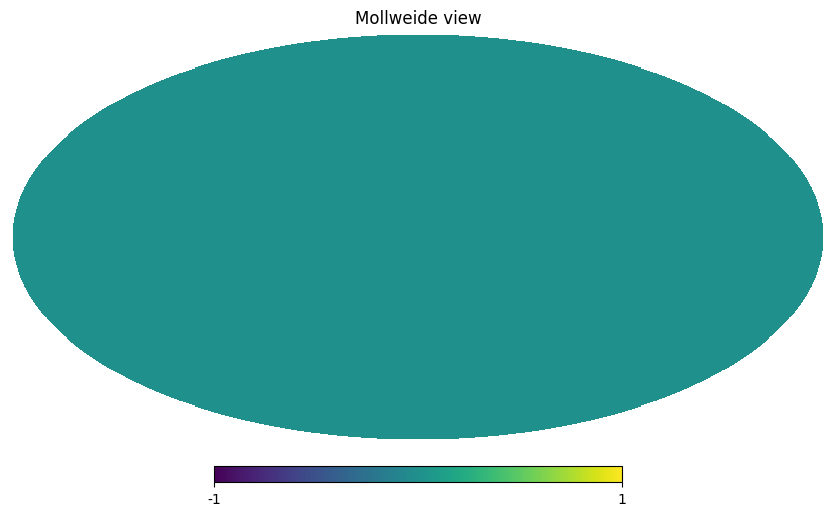

In [264]:

import healpy as hp

sys.path.append("../utils")
from utils import normalize

def denoise(arr, THRESHOLD):
    new_arr = []
    for i in range(0, len(arr)):

        neighbors = arr[i - 2 : i + 2]

        if np.v: 
            new_arr.append(0)
        else:
            new_arr.append(arr[i])
        
    new_arr.insert(0, arr[0])
    new_arr.append(arr[-1])
    
    return np.asarray(new_arr)


def find_neighbors_above_threshold(map_array, threshold):
    # Create a new array to store the filtered values
    filtered_array = np.zeros_like(map_array)

    # Get the HEALPix NSIDE and the pixel indices
    nside = hp.get_nside(map_array)
    indices = np.arange(hp.nside2npix(nside))

    # Loop through all pixel indices
    for idx in indices:
        # Get the pixel's theta and phi coordinates
        theta, phi = hp.pix2ang(nside, idx)

        # Get the neighbors of the current pixel
        neighbors = hp.get_all_neighbours(nside, theta, phi)

        # Check if any neighbor has a value greater than the threshold
        if any(map_array[neighbors] > threshold):
            filtered_array[idx] = map_array[idx]

    return filtered_array
    

for i in range(36):
    test_data_y = y_arr[i]

    # Normalize each cross section
    range_val = np.max(test_data_y) - np.min(test_data_y)

    # cross_sec = normalize(test_data_y)
    cross_sec = test_data_y

    cross_sec = denoise(cross_sec, 50)



    # minval = np.min(cross_sec[np.nonzero(cross_sec)])
    # maxval = np.max(cross_sec[np.nonzero(cross_sec)])

    # print(minval, maxval)

    hp.mollview(cross_sec)

153 513
DTYPE:  float32


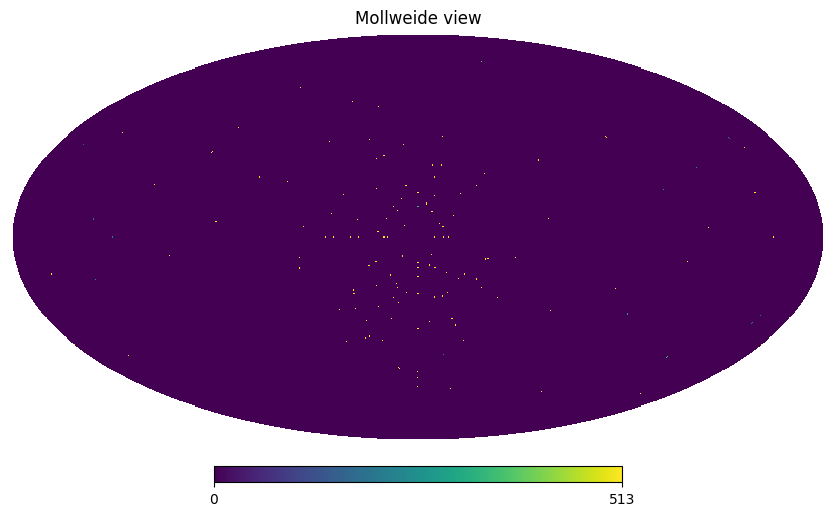

In [181]:

import torch

y_after = torch.tensor(cross_sec).to(dtype=torch.float32, device="cpu")
y_after = y_after.detach().numpy()

minval = np.min(cross_sec[np.nonzero(cross_sec)])
maxval = np.max(cross_sec[np.nonzero(cross_sec)])

print(minval, maxval)

print("DTYPE: ", y_after.dtype)

hp.mollview(y_after)

In [168]:
NSIDE = 1024
NUMPIX = 12 * NSIDE ** 2
COMPTON_RESOLUTION_DEG = 8


f = open(f"/Users/akotamraju/Documents/dev/URAP/new-responseapprox/data/full-sim-data/FlatContinuumIsotropic.inc515.id1.tra.gz.pkl", "rb");
    
vals = pickle.load(f)

split_data = create_cross_sec(vals, NSIDE, NUMPIX, COMPTON_RESOLUTION_DEG)

KeyboardInterrupt: 

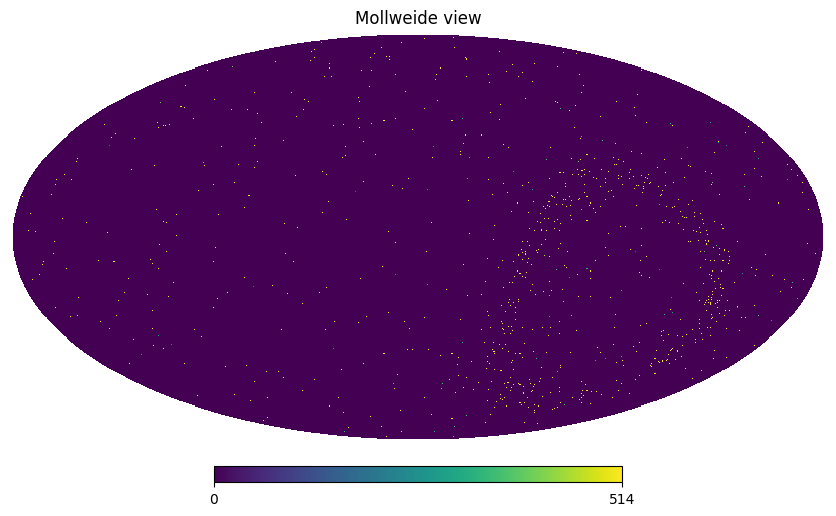

In [98]:
new_test_data = split_data['y'][5]
hp.mollview(new_test_data)

In [99]:
sys.path.append("../dataset")
print(sys.path)
from dataset.HealpixSimDataset import HealpixSimDataset


['/Users/akotamraju/Documents/dev/URAP/main-responseapprox/src/notebooks', '/Users/akotamraju/opt/anaconda3/envs/nn_response/lib/python37.zip', '/Users/akotamraju/opt/anaconda3/envs/nn_response/lib/python3.7', '/Users/akotamraju/opt/anaconda3/envs/nn_response/lib/python3.7/lib-dynload', '', '/Users/akotamraju/opt/anaconda3/envs/nn_response/lib/python3.7/site-packages', '/Users/akotamraju/opt/anaconda3/envs/nn_response/lib/python3.7/site-packages/IPython/extensions', '/Users/akotamraju/.ipython', '../scripts', '../utils', '../utils', '../scripts', '../utils', '../utils', '../utils', '../scripts', '../utils', '../scripts', '../utils', '../dataset']


ModuleNotFoundError: No module named 'dataset'

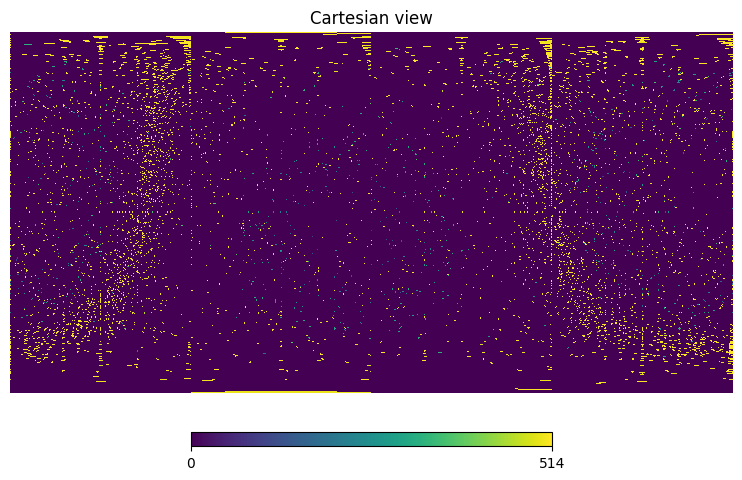

In [159]:
cartmap = hp.cartview(y_arr[20], return_projected_map=True)

In [134]:
import cv2
reshaped = cv2.resize(cartmap, (384, 512))

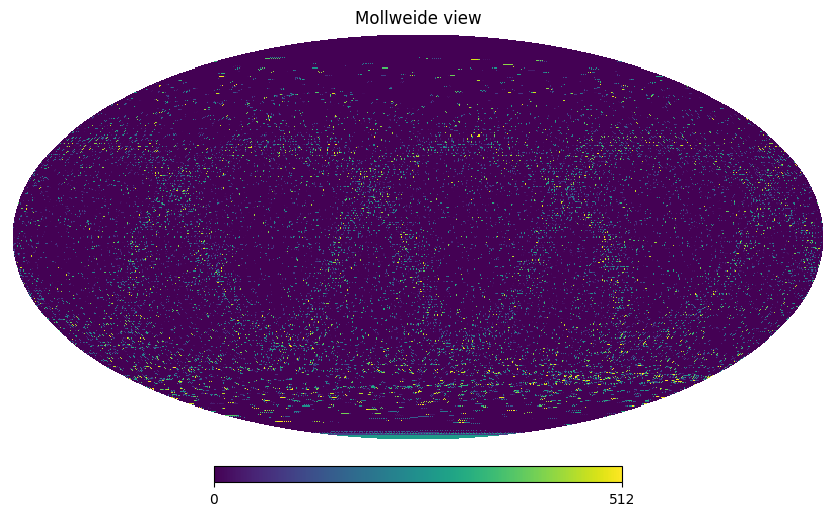

In [136]:
hp.mollview(reshaped.flatten())

In [145]:
import healpy as hp
import numpy as np

def arrange_healpix_pixels(nside, pixel_list):
    total_pixels = hp.nside2npix(nside)
    arranged_pixels = np.full(total_pixels, hp.UNSEEN)

    for pixel in pixel_list:
        arranged_pixels[pixel] = pixel

    return arranged_pixels

my_nside = 128
arranged_pixels = arrange_healpix_pixels(my_nside, y_arr[20])


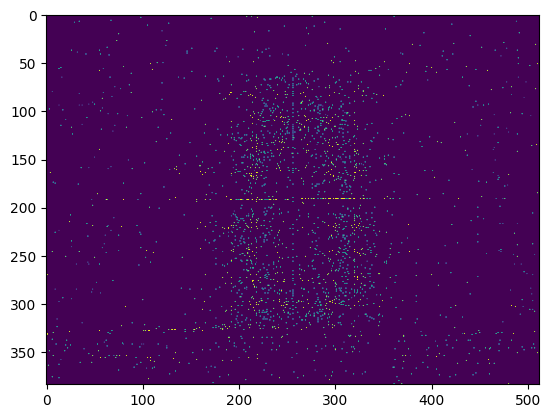

In [204]:
import matplotlib.pyplot as plt

plt.imshow(y_arr[28].reshape(384, 512))

(array([2.96000e+02, 1.20300e+03, 3.04700e+03, 6.34100e+03, 1.08320e+04,
        1.74100e+04, 1.58080e+04, 3.49600e+03, 4.96000e+02, 5.38557e+05]),
 array([ 74.4506 , 118.58249, 162.71438, 206.84627, 250.97816, 295.11005,
        339.24194, 383.37383, 427.50572, 471.63761, 515.7695 ]),
 <BarContainer object of 10 artists>)

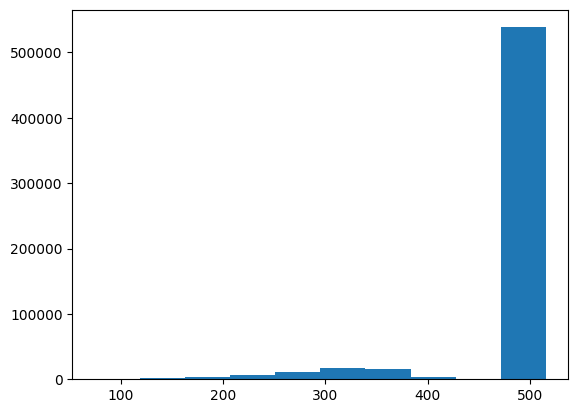

In [ ]:
import numpy as np
import pickle
import matplotlib.pyplot as plt


f = open(f"/Users/akotamraju/Documents/dev/URAP/new-responseapprox/data/full-sim-data/FlatContinuumIsotropic.inc965.id1.tra.gz.pkl", "rb");

vals = pickle.load(f)

f.close()

plt.hist(vals[2])



(array([ 18757.,  62244.,  93456., 105526., 100705.,  96599.,  53445.,
         36117.,  23052.,   7585.]),
 array([  0.,  18.,  36.,  54.,  72.,  90., 108., 126., 144., 162., 180.]),
 <BarContainer object of 10 artists>)

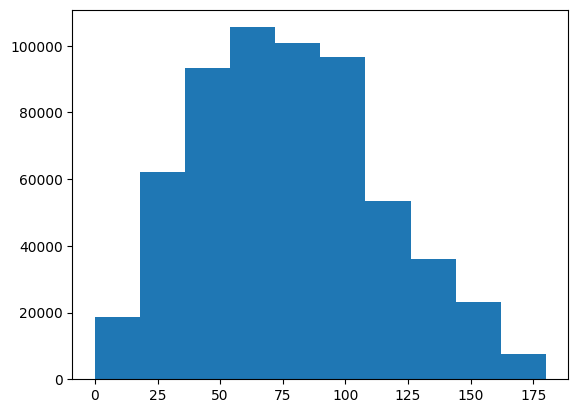

In [ ]:
plt.hist(vals[3])

In [ ]:
max(vals[4])

179.96627676698233